# Büyük Veri Analitiği

Python ile Spark'ı etkileştirerek birlikte kullanabilmek adına ilk önce bu kurulumu yaparak Spark çalışma dizinin Python'a gösterilerek birlikte kullanılabilme imkanını sağlamaktadır.

In [4]:
!pip install findspark

In [5]:
# Import etme ve Spark çalışma dizini yolunu belirtme
import findspark
findspark.init("C:\spark")

In [6]:
from pyspark import SparkContext

Yukarıda ki işlem sonucu herhangi bir problem olmamasında Spark içerisinde yer alan pyspark içerisinden bir fonksiyonu çağırabildiğimiz anlamına gelmektedir ve fiziksel olarak bağlantıyı sağlamış bulunmaktayız.

### Konfigürasyon Ayarları ve Spark Bağlantısı

Spark uygulaması çalıştırmak ve meydana getirmek için yapılması gereken konfigürasyon ayarlarını tamamlayıp bağlantısını sağlamak.

In [4]:
# Spark bağlantısı
from pyspark import SparkContext
sc = SparkContext(master = "local")
sc

<SparkContext master=local appName=pyspark-shell>

Yapmış olduğumuz uygulamaları takip edeceğimiz arayüz **Spark UI** kısmı olacaktır.

In [6]:
# Spark versiyonu
sc.version

'2.4.7'

In [7]:
# Spark Kullanıcısı
sc.sparkUser()

'lenovo'

In [8]:
dir(sc)

['PACKAGE_EXTENSIONS',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accumulatorServer',
 '_active_spark_context',
 '_batchSize',
 '_callsite',
 '_checkpointFile',
 '_conf',
 '_dictToJavaMap',
 '_do_init',
 '_encryption_enabled',
 '_ensure_initialized',
 '_gateway',
 '_getJavaStorageLevel',
 '_initialize_context',
 '_javaAccumulator',
 '_jsc',
 '_jvm',
 '_lock',
 '_next_accum_id',
 '_pickled_broadcast_vars',
 '_python_includes',
 '_repr_html_',
 '_serialize_to_jvm',
 '_temp_dir',
 '_unbatched_serializer',
 'accumulator',
 'addFile',
 'addPyFile',
 'appName',
 'applicationId',
 'binaryFiles',
 'binaryRecords',
 'broadcas

In [9]:
# Bağlantıyı kapatma
sc.stop()

In [7]:
# Gelişmiş Bağlantı Ayarı
import pyspark
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark import SparkContext

spark = SparkSession.builder \
    .master("local") \
    .appName("pyspark_uygulama") \
    .getOrCreate()

sc = spark.sparkContext
sc

<SparkContext master=local appName=pyspark_uygulama>

## Temel Data Frame İşlemleri

In [8]:
# Spark csv okuma
spark_df = spark.read.csv("diabetes.csv", header = True, inferSchema = True)

In [9]:
# Veri seti şeması
spark_df.printSchema()

root
 |-- Pregnancies: integer (nullable = true)
 |-- Glucose: integer (nullable = true)
 |-- BloodPressure: integer (nullable = true)
 |-- SkinThickness: integer (nullable = true)
 |-- Insulin: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: double (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Outcome: integer (nullable = true)



In [10]:
type(spark_df)

pyspark.sql.dataframe.DataFrame

In [11]:
# Veriyi hızlı kullanım işlemi için cache'lemek
spark_df.cache()

DataFrame[Pregnancies: int, Glucose: int, BloodPressure: int, SkinThickness: int, Insulin: int, BMI: double, DiabetesPedigreeFunction: double, Age: int, Outcome: int]

In [15]:
# Searborn içerisinden veri yükleme ve sürekli değişkenleri seçme
import seaborn as sns
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include = ["float64","int64"])

In [16]:
type(df)

pandas.core.frame.DataFrame

In [17]:
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [18]:
spark_df.head()

Row(Pregnancies=6, Glucose=148, BloodPressure=72, SkinThickness=35, Insulin=0, BMI=33.6, DiabetesPedigreeFunction=0.627, Age=50, Outcome=1)

In [21]:
df.dtypes

carat    float64
depth    float64
table    float64
price      int64
x        float64
y        float64
z        float64
dtype: object

In [22]:
spark_df.dtypes

[('Pregnancies', 'int'),
 ('Glucose', 'int'),
 ('BloodPressure', 'int'),
 ('SkinThickness', 'int'),
 ('Insulin', 'int'),
 ('BMI', 'double'),
 ('DiabetesPedigreeFunction', 'double'),
 ('Age', 'int'),
 ('Outcome', 'int')]

In [23]:
# Spark üzerinde veri seti gözlemleme
spark_df.show(5)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 5 rows



In [24]:
# Gözlem sayısı
spark_df.count()

768

In [26]:
# Değişken sayısı ve isimleri -- len kaldırılırsa değişken isimleri
len(spark_df.columns)

9

In [27]:
# Özet İstatistikler
spark_df.describe().show()

+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|summary|       Pregnancies|          Glucose|     BloodPressure|     SkinThickness|           Insulin|               BMI|DiabetesPedigreeFunction|               Age|           Outcome|
+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|  count|               768|              768|               768|               768|               768|               768|                     768|               768|               768|
|   mean|3.8450520833333335|     120.89453125|       69.10546875|20.536458333333332| 79.79947916666667|31.992578124999977|      0.4718763020833327|33.240885416666664|0.3489583333333333|
| stddev|  3.36957806269887|31.97261819513622|19.355807170644777|15.95

In [28]:
# Tek bir değişken için
spark_df.describe("Glucose").show()

+-------+-----------------+
|summary|          Glucose|
+-------+-----------------+
|  count|              768|
|   mean|     120.89453125|
| stddev|31.97261819513622|
|    min|                0|
|    max|              199|
+-------+-----------------+



In [29]:
# Değişken seçme
spark_df.select("Glucose","Pregnancies").show(5)

+-------+-----------+
|Glucose|Pregnancies|
+-------+-----------+
|    148|          6|
|     85|          1|
|    183|          8|
|     89|          1|
|    137|          0|
+-------+-----------+
only showing top 5 rows



In [30]:
# Değişken üzerinde eşsiz değer sayısı
spark_df.select("Glucose").distinct().count()

136

In [32]:
# Eksik gözlemlerin sayısı -- Eksik gözlem bulunmamaktadır.
spark_df.dropna().count()

768

In [35]:
# Eksik gözlemlerden kurtulmak
spark_df.dropna().show(3)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 3 rows



In [36]:
# Gözlem seçme
spark_df.filter(spark_df.Age > 40).count()

194

In [37]:
# Gruplama
spark_df.groupby("Outcome").count().show()

+-------+-----+
|Outcome|count|
+-------+-----+
|      1|  268|
|      0|  500|
+-------+-----+



In [38]:
spark_df.groupby("Outcome").agg({"BMI": "mean"}).show()

+-------+-----------------+
|Outcome|         avg(BMI)|
+-------+-----------------+
|      1|35.14253731343278|
|      0|30.30419999999996|
+-------+-----------------+



In [40]:
# Yeni bir değişken ekleme
spark_df.withColumn("yeni_degisken", spark_df.BMI / 2).select("BMI","yeni_degisken").show(5)

+----+-------------+
| BMI|yeni_degisken|
+----+-------------+
|33.6|         16.8|
|26.6|         13.3|
|23.3|        11.65|
|28.1|        14.05|
|43.1|        21.55|
+----+-------------+
only showing top 5 rows



In [41]:
# Var olan değişkenin ismini değiştirme
spark_df.withColumnRenamed("Outcome","bagimli_degisken").show(5)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+----------------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|bagimli_degisken|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+----------------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|               1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|               0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|               1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|               0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|               1|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+----------------+
only showing top 5 

In [44]:
# Değişken Silme
spark_df.show(3)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 3 rows



In [46]:
spark_df.drop("Insulin").columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

**Spark üzerinden Python yerelimiz üzerinde işlem yapmak için Pandas Dataframe'e dönüştürmemiz gerekmektedir.**

In [47]:
spark_df.groupby("Outcome").count().toPandas()

,Outcome,count
0,1,268
1,0,500


## SQL İşlemleri

In [48]:
spark_df.registerTempTable("table_df")

In [49]:
# Database 
spark.sql("show databases").show()

+------------+
|databaseName|
+------------+
|     default|
+------------+



In [50]:
# Table
spark.sql("show tables").show()

+--------+---------+-----------+
|database|tableName|isTemporary|
+--------+---------+-----------+
|        | table_df|       true|
+--------+---------+-----------+



In [51]:
# Veri çekme/seçme -- Glucose
spark.sql("select Glucose from table_df").show(5)

+-------+
|Glucose|
+-------+
|    148|
|     85|
|    183|
|     89|
|    137|
+-------+
only showing top 5 rows



In [54]:
spark.sql("select Outcome, mean(Glucose) from table_df group by Outcome").show()

+-------+------------------+
|Outcome|      avg(Glucose)|
+-------+------------------+
|      1|141.25746268656715|
|      0|            109.98|
+-------+------------------+



## Büyük Veri Görselleştirme

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

Büyük veride görselleştirme yapılmak istenildiğinde 2 boyut olarak düşünüp ele almamız gerekmektedir.Veri üzerinde istenilen indirgemeler yapıldıktan sonra(aggregiation fonksiyonları yardımıyla) görselleştirilmek istenilen kısım Pandas DataFrame'e dönüştürülüp daha sonrasında klasik olarak görselleştirme tekniklerini kullanabiliriz.

In [56]:
sdf = spark_df.toPandas()
sdf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


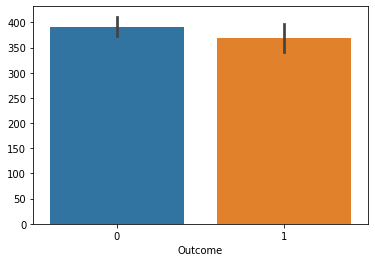

In [58]:
sns.barplot(x="Outcome", y=sdf.Outcome.index, data = sdf);

In [59]:
sc.stop()

# Uçtan Uca Büyük Veride Makine Öğrenmesi

## Spark Session ve Veri Seti